# Семинар 4. Основы работы с pandas

На этом занятии мы исследуем данные о морских портах России с помощью пакета `pandas`.

Данные загружены с портала открытых данных http://hubofdata.ru/dataset/esimo_ru_cniimf_27

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
ports = pd.read_excel('../datasets/ports_subset.xlsx') # характеристики портов
var_info = pd.read_excel('../datasets/ports_subset.xlsx', sheet_name=1) # описание переменных

Для начала, познакомимся с данными.

In [ ]:
ports.head(5)

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,TrafficSeparationSystem,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,Н,Д,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,Д,Д,NaN,1.26,NaN,81.00,143.60,NaN,12500.0,4500.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,Д,NaN,31.36,NaN,NaN,246.85,NaN,108400.0,NaN
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8


Сводка по таблице данных показывает, что числа загрузились нормально, но в некоторых столбцах есть пропущенные значения (в таблице они отображаются как `NaN` - Not a Number)

In [ ]:
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 28 columns):
Port                              56 non-null object
Sea                               56 non-null object
Region                            56 non-null object
Latitude                          56 non-null float64
Longitude                         56 non-null float64
Description                       56 non-null object
DaysNavigation                    56 non-null int64
MonthFirstIce                     44 non-null float64
MonthStableIce                    44 non-null float64
MonthIceMeltingStart              44 non-null float64
MonthClearWater                   44 non-null float64
OilTerminal                       56 non-null object
OperatorShortName                 56 non-null object
QuayageLength                     56 non-null float64
QuayageLengthRMP                  56 non-null float64
HeavyTonnageShipsFraction         56 non-null float64
NumberOfBerths                    56 non-

Для справки можем использовать вспомогательную таблицу с расшифровкой названий столбцов

In [ ]:
var_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 28 columns):
Port                              56 non-null object
Sea                               56 non-null object
Region                            56 non-null object
Latitude                          56 non-null float64
Longitude                         56 non-null float64
Description                       56 non-null object
DaysNavigation                    56 non-null int64
MonthFirstIce                     44 non-null float64
MonthStableIce                    44 non-null float64
MonthIceMeltingStart              44 non-null float64
MonthClearWater                   44 non-null float64
OilTerminal                       56 non-null object
OperatorShortName                 56 non-null object
QuayageLength                     56 non-null float64
QuayageLengthRMP                  56 non-null float64
HeavyTonnageShipsFraction         56 non-null float64
NumberOfBerths                    56 non-

## Задача 1. Выборка столбцов

1.1. Выведите таблицу с тремя столбцами: порт, акватория порта, площадь территории, пропускная способность контейнерных терминалов.

In [ ]:
ports[['Port', 'Sea', 'PortArea', 'CapacityContainers']].head()

,Port,Sea,PortArea,CapacityContainers
0,Выборг,Балтийское,16.66,6.0
1,Высоцк,Балтийское,143.60,NaN
2,Калининград,Балтийское,832.36,448.0
3,Приморск,Балтийское,246.85,NaN
4,Большой порт Санкт-Петербург,Балтийское,528.47,3010.2


1.2. Выведите таблицу со всеми столбцами начиная от `Port` до `DaysNavigation`

In [ ]:
ports.loc[:, 'Port':'DaysNavigation']

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365


1.3. Выведите таблицу со столбцами от `Port` до `DaysNavigation`, включающие записи с 10 по 19.

In [ ]:
ports.loc[:, 'Port':'DaysNavigation'].iloc[9:19]

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365
10,Нарьян-Мар,Баренцево,Арктика,67.647310,52.998083,"70 миль от устья р. Печора, впадающей в Печорс...",150
11,Варандей,Баренцево,Арктика,68.848655,58.243434,побережье Баренцева моря в районе Варандейской...,365
12,Витино,Белое,Арктика,67.079438,32.321429,западный берег Кандалакшского залива Белого моря,365
13,Мурманск,Баренцево,Арктика,68.978155,33.064089,"Кольский полуостров, побережье Баренцева моря",365
14,Дудинка,Карское,Арктика,69.408222,86.157587,правый берег р. Енисей в 230 милях от ее устья...,365
15,Кандалакша,Белое,Арктика,67.137266,32.408883,"Кандалакшский залив, северо-западная часть Бел...",365
16,Астрахань,Каспийское,Юг,46.385538,48.023436,"устье р. Волга, верхняя часть ее дельты",365
17,Оля,Каспийское,Юг,45.783430,47.549565,"дельта р. Волга, 67 км. Волго-Каспийского канала",365
18,Новороссийск,Черное,Юг,44.734866,37.793588,"северо-восток Черного моря, Новороссийская (Це...",365


## Задача 2. Фильтрация данных по условию

2.1. Выведите таблицу с названиями и координатами портов на Балтике. Данные можно отобрать по столбцу Акватория порта (`Sea`). 

**Подсказка:** Посмотреть, какие названия акватории используются в данных, удобно использовать метод `unique()` столбца.

In [ ]:
print(ports['Sea'].unique())

['Балтийское' 'Белое' 'Восточно-Сибирское' 'Баренцево' 'Карское'
 'Каспийское' 'Черное' 'Азовское' 'Японское' 'Берингово' 'Охотское'
 'Тихий океан' 'Лаптевых']


In [ ]:
ports.query('Sea == "Балтийское"')[['Port','Sea', 'Latitude', 'Longitude']]

,Port,Sea,Latitude,Longitude
0,Выборг,Балтийское,60.708912,28.733285
1,Высоцк,Балтийское,60.617813,28.563421
2,Калининград,Балтийское,54.702594,20.467366
3,Приморск,Балтийское,60.335655,28.715618
4,Большой порт Санкт-Петербург,Балтийское,59.895170,30.218395
5,Пассажирский порт Санкт-Петербург,Балтийское,59.950931,30.195580
6,Усть-Луга,Балтийское,59.684950,28.426347


2.2. Выведите таблицу с данными о портах, которые имеют круглогодичную навигацию и имеют контейнерный терминал. В таблице должны быть название и акватория порта, а также столбцы, по которым вы отбирали данные.

In [ ]:
ports.query('DaysNavigation == "365" & CapacityContainers != "NaN"')[['Port', 'Sea', 'DaysNavigation', 'CapacityContainers']]

,Port,Sea,DaysNavigation,CapacityContainers
0,Выборг,Балтийское,365,6.0
2,Калининград,Балтийское,365,448.0
4,Большой порт Санкт-Петербург,Балтийское,365,3010.2
7,Архангельск,Белое,365,75.0
11,Варандей,Баренцево,365,1.7
13,Мурманск,Баренцево,365,123.9
14,Дудинка,Карское,365,25.5
16,Астрахань,Каспийское,365,23.4
18,Новороссийск,Черное,365,652.0
19,Анапа,Черное,365,2.0


2.3. Выведите таблицу с данными о портах, в описании которых упоминается Сахалин (название, акватория, описание, широта и долгота)

In [ ]:
ports[(ports['Description']).str.contains('Сахалин')][['Port', 'Sea', 'Description', 'Latitude', 'Longitude']]

,Port,Sea,Description,Latitude,Longitude
31,Александровск-Сахалинский,Японское,средняя часть западного побережья острова Саха...,50.896081,142.131616
46,Пригородное,Охотское,"южное побережье о. Сахалин, залив Анива к вост...",46.626414,142.908489
48,Шахтерск,Японское,"западное побережье о. Сахалин, берег Татарског...",49.161158,142.055581
50,Невельск,Японское,"западное побережье южной части о. Сахалин, бер...",46.670286,141.854201
51,Корсаков,Охотское,"южное побережье о. Сахалин, северо-восточная ч...",46.619954,142.767234
52,Москальво,Охотское,"восточная часть Сахалинского залива, залив Бай...",53.547904,142.517065
53,Поронайск,Охотское,"восточное побережье о. Сахалин, залив Терпения...",49.228236,143.116792
54,Холмск,Японское,"южная часть западного побережья о. Сахалин, ве...",47.048291,142.040565


## Задача 3. Вычисления

3.1. В столбцах таблицы с мощностью портов по переработке контейнеров, сухих и жидких грузов есть пропущенные значения. Если попытаться использовать их в расчета, то результат тоже будет пустым значением. Замените пустые значения в этих столбцах на 0.

**Подсказка:** у рядов и таблиц данных есть метод `fillna()`, который позволяет заменить пропуски на указанное значение. 
Еще один способ - использовать условное вычисление и метод `replace()` столбца или таблицы. Заменять нужно пустые значения, которые в `pandas` обозначаются `np.nan`

**Еще подсказка:** Срезы в `pandas`, как и в `numpy`, работают как на чтение, так и на запись. Поэтому, если подумать, то можно заменить пустые значения во всех столбцах с мощностью портов сразу.

In [ ]:
ports[['CapacityContainers', 'CapacityLiquidBulkTerminal', 'CapacityDryBulkTerminal']].fillna(0)

,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal
0,6.0,70.0,1420.0
1,0.0,12500.0,4500.0
2,448.0,18320.0,16383.2
3,0.0,108400.0,0.0
4,3010.2,17773.8,32425.8
5,0.0,0.0,0.0
6,0.0,1.0,31638.3
7,75.0,4900.0,6481.9
8,15.0,0.0,150.0
9,0.0,3.0,258.5


3.2. Рассчитайте столбец `TotalCapacity` с общей мощностью портов. Мощности по сухим и жидким грузам даны в тысячах тонн в год, а по контейнерам - в  тысячах в год контейнеров. Чтобы рассчитать общую мощность в тоннах / год, примем, что вес одного контейнера равен 20 тоннам.

In [ ]:
ports.fillna(value = {'CapacityContainers':0, 'CapacityLiquidBulkTerminal':0, 'CapacityDryBulkTerminal':0}, inplace=True).head()

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,Д,местный,2.87,3.70,39.80,16.66,6.0,70.0,1420.0,1610.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,Д,NaN,1.26,NaN,81.00,143.60,0.0,12500.0,4500.0,17000.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,Д,паромный,17.73,162.87,509.20,832.36,448.0,18320.0,16383.2,43663.2
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,Д,NaN,31.36,NaN,NaN,246.85,0.0,108400.0,0.0,108400.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,Д,круизный,628.90,153.62,2265.47,528.47,3010.2,17773.8,32425.8,110403.6


In [ ]:
ports['TotalCapacity'] = (ports['CapacityContainers'] * 20 + ports['CapacityLiquidBulkTerminal'] + ports['CapacityDryBulkTerminal'])
pd.DataFrame(ports['TotalCapacity'])

,TotalCapacity
0,1610.0
1,17000.0
2,43663.2
3,108400.0
4,110403.6
5,0.0
6,31639.3
7,12881.9
8,450.0
9,261.5


## Задача 4. Сортировка и ранжирование


4.1. Выведите рейтинг балтийских портов по убыванию общей мощности

In [ ]:
ports.sort_values('TotalCapacity', ascending = False).query('Sea == "Балтийское"')[['Port', 'Region', 'Sea', 'TotalCapacity']]

,Port,Region,Sea,TotalCapacity
4,Большой порт Санкт-Петербург,Запад,Балтийское,110403.6
3,Приморск,Запад,Балтийское,108400.0
2,Калининград,Запад,Балтийское,43663.2
6,Усть-Луга,Запад,Балтийское,31639.3
1,Высоцк,Запад,Балтийское,17000.0
0,Выборг,Запад,Балтийское,1610.0
5,Пассажирский порт Санкт-Петербург,Запад,Балтийское,0.0


4.2. Составьте рейтинг портов для каждого региона (`Region`) по убыванию общей мощности. Названия регионов должны быть упорядочены по возрастанию.

In [ ]:
ports.sort_values(by = ['Region','TotalCapacity'], ascending = [True, False])[['Port','Region','TotalCapacity']]

,Port,Region,TotalCapacity
13,Мурманск,Арктика,23963.4
7,Архангельск,Арктика,12881.9
11,Варандей,Арктика,12114.0
12,Витино,Арктика,11000.0
14,Дудинка,Арктика,2089.0
15,Кандалакша,Арктика,1516.8
32,Анадырь,Арктика,920.0
10,Нарьян-Мар,Арктика,500.0
8,Певек,Арктика,450.0
49,Эгвекинот,Арктика,390.0


4.3. Выведите данные о пяти самых северных портах

In [ ]:
ports.sort_values('Region', ascending = True)[:5]

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,VesselTrackingManagementSystem,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
33,Беринговский,Берингово,Арктика,63.064962,179.366889,юго-западный берег Анадырского залива Берингов...,90,10.0,10.0,5.0,...,Н,местный,43.18,0.40,NaN,22.12,0.5,0.0,246.0,256.0
44,Тикси,Лаптевых,Арктика,71.645311,128.885228,"западный берег бухты Тикси моря Лаптевых, близ...",90,9.0,10.0,6.0,...,Н,местный,96.78,3.83,32.35,7.29,0.0,0.0,67.0,67.0
32,Анадырь,Берингово,Арктика,64.730682,177.537468,устье р. Анадырь в северной части Берингова моря,90,10.0,10.0,5.0,...,Н,местный,45.33,NaN,15.14,11.89,2.5,0.0,870.0,920.0
15,Кандалакша,Белое,Арктика,67.137266,32.408883,"Кандалакшский залив, северо-западная часть Бел...",365,1.0,1.0,4.0,...,Н,NaN,5.09,11.05,25.58,26.00,0.0,16.8,1500.0,1516.8
14,Дудинка,Карское,Арктика,69.408222,86.157587,правый берег р. Енисей в 230 милях от ее устья...,365,9.0,9.0,5.0,...,Н,местный,30.22,NaN,NaN,24.92,25.5,50.0,1529.0,2089.0


4.4. Добавьте в таблицу столбец с рангом всех портов по убыванию площади акватории.

In [ ]:
ports['RangWaterArea'] = ports['WaterArea'].rank(ascending = False)
ports

,Port,Sea,Region,Latitude,Longitude,Description,DaysNavigation,MonthFirstIce,MonthStableIce,MonthIceMeltingStart,...,PassengerTerminalType,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity,RangWaterArea
0,Выборг,Балтийское,Запад,60.708912,28.733285,"центр г. Выборг, побережье Выборгского залива",365,12.0,12.0,4.0,...,местный,6.0,3.70,39.80,16.66,6.0,70.0,1420.0,1610.0,51.0
1,Высоцк,Балтийское,Запад,60.617813,28.563421,о. Высоцкий в Выборгском заливе,365,12.0,12.0,4.0,...,NaN,3.0,NaN,81.00,143.60,0.0,12500.0,4500.0,17000.0,54.0
2,Калининград,Балтийское,Запад,54.702594,20.467366,устье р. Преголя в юго-восточной части Балтийс...,365,NaN,NaN,NaN,...,паромный,26.0,162.87,509.20,832.36,448.0,18320.0,16383.2,43663.2,31.0
3,Приморск,Балтийское,Запад,60.335655,28.715618,юго-восточная часть пролива Бъёркезунд Финског...,365,12.0,12.0,4.0,...,NaN,34.0,NaN,NaN,246.85,0.0,108400.0,0.0,108400.0,23.0
4,Большой порт Санкт-Петербург,Балтийское,Запад,59.895170,30.218395,острова дельты р. Невы в Невской губе в восточ...,365,11.0,12.0,3.0,...,круизный,54.0,153.62,2265.47,528.47,3010.2,17773.8,32425.8,110403.6,3.0
5,Пассажирский порт Санкт-Петербург,Балтийское,Запад,59.950931,30.195580,"Невская губа Финского залива Балтийского моря,...",365,11.0,12.0,3.0,...,круизный,7.0,NaN,NaN,33.03,0.0,0.0,0.0,0.0,50.0
6,Усть-Луга,Балтийское,Запад,59.684950,28.426347,восточное и южное побережье Лужской губы Финск...,365,12.0,12.0,4.0,...,паромный,46.0,52.56,381.04,1045.91,0.0,1.0,31638.3,31639.3,11.0
7,Архангельск,Белое,Арктика,64.528941,40.539525,устье р. Северная Двина,365,10.0,11.0,4.0,...,местный,50.0,149.92,546.40,212.27,75.0,4900.0,6481.9,12881.9,7.0
8,Певек,Восточно-Сибирское,Арктика,69.704154,170.256541,Чаунская губа Восточно-Сибирского моря,120,11.0,11.0,6.0,...,эпизод,14.0,4.18,77.80,19.00,15.0,0.0,150.0,450.0,43.0
9,Онега,Белое,Арктика,63.903055,38.095320,"3 мили выше устья р. Онега, впадающей в Онежск...",365,10.0,11.0,4.0,...,местный,55.0,15.00,73.00,2.68,0.0,3.0,258.5,261.5,2.0


## Задача 5. Описательная статистика

5.1. Рассчитайте сводку с описательными статистиками для всех столбцов от `QuayageLength` до `TotalCapacity`. 
Рассчитайте асимметрию этих столбцов. Какой вывод можно сделать о форме распределений этих переменных? Почему значение `count` различается для разных столбцов?

In [ ]:
ports.loc[:, 'QuayageLength':'TotalCapacity'].describe()

,QuayageLength,QuayageLengthRMP,HeavyTonnageShipsFraction,NumberOfBerths,WaterArea,ShelteredStorageArea,UnshelteredStorageArea,PortArea,CapacityContainers,CapacityLiquidBulkTerminal,CapacityDryBulkTerminal,TotalCapacity
count,56.000000,56.000000,56.000000,56.000000,56.000000,44.000000,48.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,4377.362500,3429.789286,0.126607,32.232143,28.500000,40.486136,180.562292,137.730893,114.237500,7526.769643,5218.321429,15029.841071
std,6024.997135,4719.283893,0.277536,45.430463,16.309506,68.227045,351.518047,212.444588,423.220089,21039.451280,8380.760752,29540.341067
min,200.000000,176.200000,0.000000,2.000000,1.000000,0.350000,0.970000,1.470000,0.000000,0.000000,0.000000,0.000000
25%,692.250000,640.000000,0.000000,6.750000,14.750000,3.605000,25.485000,17.702500,0.000000,0.000000,267.125000,738.350000
50%,1960.500000,1736.650000,0.000000,13.000000,28.500000,11.010000,47.825000,38.765000,2.650000,280.000000,1514.500000,3412.000000
75%,4041.925000,3076.000000,0.042500,30.250000,42.250000,34.892500,189.985000,202.820000,30.050000,5050.000000,4822.625000,12885.975000
max,27915.200000,22364.200000,1.000000,183.000000,56.000000,316.130000,2265.470000,1045.910000,3010.200000,112748.000000,32425.800000,157325.300000


5.2. Рассчитайте коэффициент вариации для перечисленных выше столбцов (отношение стандартного отклонения к среднему значению). Какой столбец имеет наибольший коэффициент вариации?

**Подсказка**: Для этой задачи можно воспользоваться тем, что сводка со статистиками - тоже таблица, с которой можно работать дальше. Или можно воспользоваться тем, что в `pandas` описательные статистики можно вычислять сразу для нескольких столбцов.

In [ ]:
pd.DataFrame(ports.loc[:,'QuayageLength':'TotalCapacity'].std() / ports.loc[:,'QuayageLength':'TotalCapacity'].mean())

,0
QuayageLength,1.376399
QuayageLengthRMP,1.375969
HeavyTonnageShipsFraction,2.192107
NumberOfBerths,1.409477
WaterArea,0.572263
ShelteredStorageArea,1.685195
UnshelteredStorageArea,1.946797
PortArea,1.542461
CapacityContainers,3.704739
CapacityLiquidBulkTerminal,2.795283


5.3. Постройте гистограмму распределения площади портов

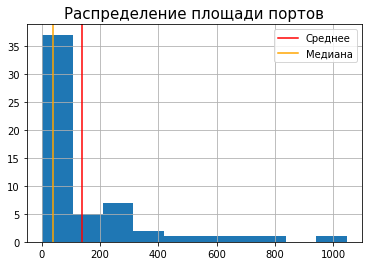

In [ ]:
histogram = ports['PortArea'].hist()
histogram.axvline(ports['PortArea'].mean(), color = 'red', label = 'Среднее')
histogram.axvline(ports['PortArea'].median(), color = 'orange', label = 'Медиана')
histogram.legend();
histogram.set_title('Распределение площади портов', fontsize = 15);

5.4. Получите рейтинг регионов по количеству портов в них

In [ ]:
pd.DataFrame(ports['Region'].value_counts())

,Region
Дальний Восток,21
Юг,15
Арктика,13
Запад,7


5.5. Постройте рейтинг морей по количеству портов в них в виде столбиковой диаграммы. Столбики должны быть расположены горизонтально, чтобы удобно читались их подписи, и должны быть расположены по убыванию.

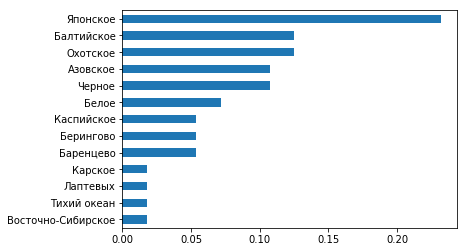

In [ ]:
ports['Sea'].value_counts(normalize = True, ascending = True).plot(kind = 'barh');